<a href="https://colab.research.google.com/github/malbatahan100/curso1/blob/main/M%C3%93DULO_4_CURSORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

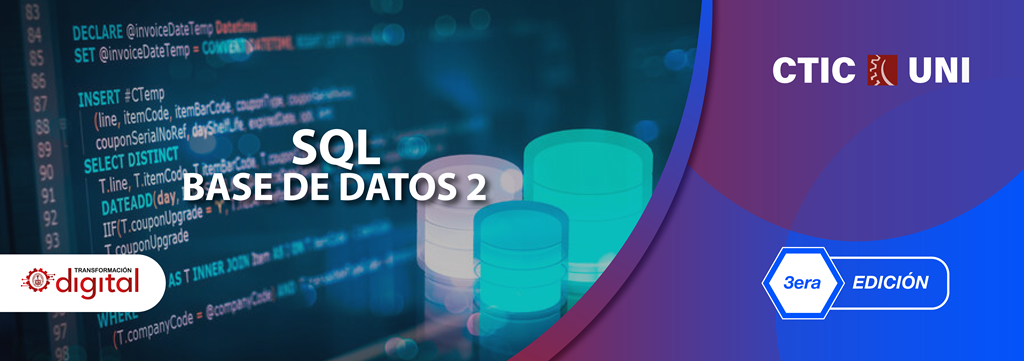

<table border=1 width='99%'>
<tr>
<td bgcolor='#B00A0F'>

# **<font color="#FFFFFF"> MÓDULO 4.- CURSORES</font>**
</td>
</tr>
</table>

Los cursores son objetos que permiten recorrer fila a fila una **tabla** o **vista** de forma individual.

Los cursores son útiles cuando se necesita procesar datos de una tabla de forma individual o cuando se necesita hacer cálculos complejos en función de los datos de cada fila.

Un cursor se define en una consulta SQL y se utiliza para recorrer las filas de una tabla una por una. A medida que el cursor avanza por las filas, se pueden realizar operaciones en cada fila, como actualizar, eliminar o insertar datos.

Los cursores se utilizan en SQL Server principalmente en programación de procedimientos almacenados y funciones para procesar datos en tiempo real y realizar operaciones complejas en los datos.

Sin embargo, su uso debe ser cuidadoso, ya que pueden afectar negativamente el rendimiento de la base de datos si se utilizan de manera inadecuada.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Ventajas de usar cursores</font>**
</td>
</tr>
</table>

Aunque los cursores tienen algunas desventajas, también tienen algunas ventajas que pueden hacer que sean útiles en ciertos casos, como:

>* **Permiten procesamiento iterativo**: Los cursores permiten procesar los resultados de una consulta en una base de datos de forma iterativa, lo que puede ser útil en situaciones en las que se requiere un procesamiento complejo o personalizado de los datos.
>* **Facilitan la manipulación de datos**: Los cursores pueden facilitar la manipulación de datos en situaciones en las que se requiere el procesamiento de grandes volúmenes de información de forma detallada o secuencial.
>* **Permiten procesamiento basado en condiciones**: Los cursores permiten procesar los resultados de una consulta en una base de datos en función de condiciones específicas, lo que puede ser útil en situaciones en las que se necesita realizar un procesamiento condicional de los datos.
>* **Permiten el control del flujo del programa**: Los cursores permiten un mayor control del flujo del programa al permitir iterar a través de los resultados de una consulta de forma personalizada y flexible.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Desventajas de usar cursores</font>**
</td>
</tr>
</table>

Los cursores en programación son una herramienta que permiten recorrer y manipular los resultados de una consulta en una base de datos de manera iterativa.

Aunque pueden ser útiles en algunos casos, también tienen algunas desventajas, como las siguientes:

>* **Consumen recursos**: Los cursores consumen memoria y recursos del servidor, lo que puede ralentizar el rendimiento del sistema y afectar a otros procesos.
>* **Pueden generar bloqueos**: Cuando se utiliza un cursor para recorrer una tabla, esta se bloquea para el resto de procesos, lo que puede generar bloqueos y retrasos en otras operaciones.
>* **No escalan bien**: Los cursores no escalan bien en sistemas con grandes volúmenes de datos, ya que su capacidad para procesar grandes cantidades de información es limitada.
>* **Pueden generar problemas de rendimiento**: Si no se utilizan correctamente, los cursores pueden generar problemas de rendimiento en la base de datos, ya que aumentan el uso de CPU y la carga en el servidor.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Ejemplos de cursores</font>**
</td>
</tr>
</table>



```
USE Northwind
GO
DECLARE ucr_categoria CURSOR
FOR
	SELECT CategoryID, CategoryName, Description
	FROM Categories;

OPEN ucr_categoria;

FETCH NEXT FROM ucr_categoria;
WHILE @@FETCH_STATUS = 0
BEGIN
	FETCH NEXT FROM ucr_categoria;
	PRINT CONCAT('@@FETCH_STATUS: ', @@FETCH_STATUS)
END
CLOSE ucr_categoria;
DEALLOCATE ucr_categoria;
GO
```



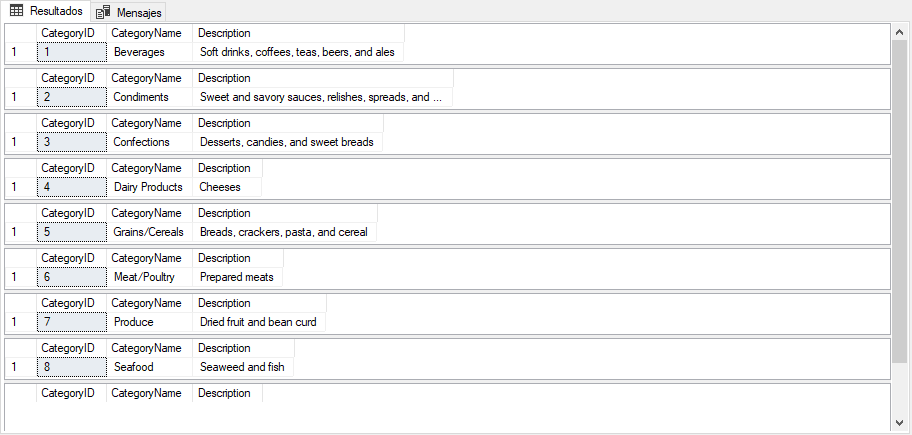



```
USE Northwind
GO
SET NOCOUNT ON;

DECLARE @CategoryID			int;
DECLARE @CategoryName		nvarchar(15);
DECLARE @Description		nvarchar(4000);

DECLARE ucr_categoria CURSOR
FOR
	SELECT CategoryID, CategoryName, Description
	FROM Categories;

OPEN ucr_categoria;

FETCH NEXT FROM ucr_categoria
INTO
	@CategoryID,
	@CategoryName,
	@Description;

WHILE @@FETCH_STATUS = 0
BEGIN
	PRINT CONCAT(@CategoryID, ': ', @CategoryName)
	FETCH NEXT FROM ucr_categoria
	INTO
		@CategoryID,
		@CategoryName,
		@Description;
END
CLOSE ucr_categoria;
DEALLOCATE ucr_categoria;
GO

```





```
1: Beverages
2: Condiments
3: Confections
4: Dairy Products
5: Grains/Cereals
6: Meat/Poultry
7: Produce
8: Seafood
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Función escalar para convertir un monto a palabras </font>**
</td>
</tr>
</table>



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sysobjects
	WHERE
			xtype = 'FN'
		AND
			name = 'ufn_num_pal '
)
DROP FUNCTION ufn_num_pal
GO
CREATE FUNCTION ufn_num_pal
(
	@monto float
)
RETURNS VARCHAR(200)
AS
BEGIN
	DECLARE @pal VARCHAR(200);
	DECLARE @n		INT = CONVERT(INT, @monto);
	DECLARE @f		INT = CONVERT(INT,100.0 * (@monto - CAST(@monto AS INT))+0.00000000000001);

	DECLARE @m		INT;
	DECLARE @c		INT;
	DECLARE @d		INT;
	DECLARE @u		INT;

	SET @m = @n / 1000;
	SET @n -= @m * 1000;

	SET @c = @n / 100;
	SET @n -= @c * 100;

	SET @d = @n / 10;
	SET @u = @n - @d * 10;

	SET @pal =
	(
		SELECT
			CASE @m
				WHEN 1 THEN 'MIL '
				WHEN 2 THEN 'DOS MIL '
				WHEN 3 THEN 'TRES MIL '
				WHEN 4 THEN 'CUATRO MIL '
				WHEN 5 THEN 'CINCO MIL '
				WHEN 6 THEN 'SEIS MIL '
				WHEN 7 THEN 'SIETE MIL '
				WHEN 8 THEN 'OCHO MIL '
				WHEN 9 THEN 'NUEVE MIL '
				ELSE ''
			END
	)
	SET @pal +=
	(
		SELECT
			CASE @c
				WHEN 1 THEN IIF(@d+@u = 0, 'CIEN', 'CIENTO ')
				WHEN 2 THEN 'DOSCIENTOS '
				WHEN 3 THEN 'TRESCIENTOS '
				WHEN 4 THEN 'CUATROCIENTOS '
				WHEN 5 THEN 'QUINIENTOS '
				WHEN 6 THEN 'SEISCIENTOS '
				WHEN 7 THEN 'SETECIENTOS '
				WHEN 8 THEN 'OCHOCIENTOS '
				WHEN 9 THEN 'NOVECIENTOS '
				ELSE ''
			END
	)

	SET @pal +=
	(
		SELECT
			CASE @d
				WHEN 1 THEN
					CASE @u
						WHEN 0 THEN 'DIEZ'
						WHEN 1 THEN 'ONCE'
						WHEN 2 THEN 'DOCE'
						WHEN 3 THEN 'TRECE'
						WHEN 4 THEN 'CATORCE'
						WHEN 5 THEN 'QUINCE'
						WHEN 6 THEN 'DIECISÉIS'
						WHEN 7 THEN 'DIESISIETE'
						WHEN 8 THEN 'DIECIOCHO'
						WHEN 9 THEN 'DIECINUEVE'
					END
				WHEN 2 THEN
					CASE @u
						WHEN 0 THEN 'VEINTE'
						WHEN 1 THEN 'VEINTIUNO'
						WHEN 2 THEN 'VEINTIDÓS'
						WHEN 3 THEN 'VEINTITRÉS'
						WHEN 4 THEN 'VEINTICUATRO'
						WHEN 5 THEN 'VEINTICINCO'
						WHEN 6 THEN 'VEINTISÉIS'
						WHEN 7 THEN 'VEINTISIETE'
						WHEN 8 THEN 'VEINTIOCHO'
						WHEN 9 THEN 'VEINTINUEVE'
					END
				WHEN 3 THEN 'TREINTA'
				WHEN 4 THEN 'CUARENTA'
				WHEN 5 THEN 'CINCUENTA'
				WHEN 6 THEN 'SESENTA'
				WHEN 7 THEN 'SETENTA'
				WHEN 8 THEN 'OCHENTA'
				WHEN 9 THEN 'NOVENTA'
				ELSE ''
			END
	)
	SET @pal += IIF(@d >= 3 AND @u != 0, ' Y ', '')
	IF @d != 1 AND @d!=2
	SET @pal +=
	(
		SELECT
			CASE @u
				WHEN 1 THEN 'UNO'
				WHEN 2 THEN 'DOS'
				WHEN 3 THEN 'TRES'
				WHEN 4 THEN 'CUATRO'
				WHEN 5 THEN 'CINCO'
				WHEN 6 THEN 'SEIS'
				WHEN 7 THEN 'SIETE'
				WHEN 8 THEN 'OCHO'
				WHEN 9 THEN 'NUEVE'
				ELSE ''
			END
	)


	SET @pal = CONCAT(@pal, ' CON ', @f, '/100 SOLES ')

	RETURN @pal

END
GO
SELECT dbo.ufn_num_pal(1.20)
GO
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Ejemplo de un cursor anidado</font>**
</td>
</tr>
</table>



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_pedido'
)
DROP PROCEDURE usp_pedido;
GO
CREATE PROCEDURE usp_pedido
(
	@OrderID INT
)
AS
BEGIN
	SET NOCOUNT ON;

	DECLARE @OrderDate                  datetime;
	DECLARE @RequiredDate               datetime;
	DECLARE @ShippedDate                datetime;
	DECLARE @Freight                    money;
	DECLARE @ShipVia                    int;
	DECLARE @ShipName                   nvarchar(40);
	DECLARE @ShipAddress                nvarchar(60);
	DECLARE @ShipCity                   nvarchar(15);
	DECLARE @ShipRegion                 nvarchar(15);
	DECLARE @ShipPostalCode             nvarchar(10);
	DECLARE @ShipCountry                nvarchar(15);
	DECLARE @CustomerID                 nchar(5);
	DECLARE @CompanyName                nvarchar(40);
	DECLARE @Address                    nvarchar(60);
	DECLARE @Country                    nvarchar(15);

	DECLARE @ProductID					int;
	DECLARE @ProductName				nvarchar(40);
	DECLARE @UnitPrice					money;
	DECLARE @Quantity					smallint;
	DECLARE @Discount					real;

	DECLARE @ITEM						int;
	DECLARE @Total						money;

	DECLARE ucr_pedido CURSOR
	FOR
	SELECT
		o.[OrderID]
		,o.[OrderDate]
		,o.[RequiredDate]
		,o.[ShippedDate]
		,o.[Freight]
		,o.[ShipVia]
		,o.[ShipName]
		,o.[ShipAddress]
		,o.[ShipCity]
		,o.[ShipRegion]
		,o.[ShipPostalCode]
		,o.[ShipCountry]
		,c.[CustomerID]
		,c.[CompanyName]
		,c.[Address]
		,c.[Country]
	FROM [Northwind].[dbo].[Orders] o
	INNER JOIN [Northwind].[dbo].[Customers] c
	ON c.CustomerID = o.CustomerID
	WHERE OrderID = @OrderID

	OPEN ucr_pedido;

	FETCH NEXT FROM ucr_pedido
	INTO
		@OrderID,
		@OrderDate,
		@RequiredDate,
		@ShippedDate,
		@Freight,
		@ShipVia,
		@ShipName,
		@ShipAddress,
		@ShipCity,
		@ShipRegion,
		@ShipPostalCode,
		@ShipCountry,
		@CustomerID,
		@CompanyName,
		@Address,
		@Country;

	WHILE @@FETCH_STATUS = 0
	BEGIN
		PRINT '';
		PRINT CONCAT(SPACE(50), 'Pedido: ', @OrderID)
		PRINT '';
		PRINT CONCAT(SPACE(41), 'Fecha de pedido: ', CONVERT(CHAR(10), @OrderDate, 103));
		PRINT CONCAT(SPACE(34), 'Fecha de requerimiento: ', CONVERT(CHAR(10), @RequiredDate, 103));
		PRINT CONCAT(SPACE(40), 'Fecha de entrega: ', CONVERT(CHAR(10), @ShippedDate, 103));
		PRINT '';
		PRINT CONCAT(SPACE(2), 'Cliente: ', @CompanyName);
		PRINT CONCAT('Dirección: ', @Address);
		PRINT CONCAT(SPACE(5), 'País: ', @Country);
		-- ###########################################
		DECLARE ucr_pedido_detalle CURSOR
		FOR
			SELECT
				p.[ProductID]
				,p.[ProductName]
				,od.[UnitPrice]
				,od.[Quantity]
				,od.[Discount]
			FROM  [dbo].[Products] p
			INNER JOIN [dbo].[Order Details] od
			ON p.ProductID = od.ProductID
			WHERE [OrderID] = @OrderID;

		OPEN ucr_pedido_detalle;

		FETCH NEXT FROM ucr_pedido_detalle
		INTO  
			@ProductID,
			@ProductName,
			@UnitPrice,
			@Quantity,
			@Discount;
		SET @ITEM = 1;

		PRINT '';
		PRINT CONCAT
				(
					' ID  ',
					LEFT('PRODUCTO' + SPACE(39), 39),
					LEFT('CANT' + SPACE(6), 6),
					LEFT(' PRECIO' + SPACE(9), 9),
					LEFT('DSC.' + SPACE(5), 5),
					LEFT('MONTO' + SPACE(5), 5)
				)
		PRINT REPLICATE('─', 69);
		SET @Total = 0;
		WHILE @@FETCH_STATUS = 0
		BEGIN
			PRINT CONCAT
				(
					'I', RIGHT('00'+ LTRIM(@ITEM),2),SPACE(2),
					LEFT(@ProductName+SPACE(35),35),
					RIGHT(SPACE(8) + LTRIM(@Quantity), 8),
					RIGHT(SPACE(8) + LTRIM(@UnitPrice), 8),
					RIGHT(SPACE(5) + LTRIM(@UnitPrice*@Discount*100), 5),
					RIGHT(SPACE(8) + LTRIM(CONVERT(DECIMAL(10, 2), @Quantity*@UnitPrice*(1-@Discount))), 8)
				)
			SET @Total += @Quantity*@UnitPrice*(1-@Discount);
			SET @ITEM += 1;
			FETCH NEXT FROM ucr_pedido_detalle
			INTO  
				@ProductID,
				@ProductName,
				@UnitPrice,
				@Quantity,
				@Discount;
		END
		PRINT REPLICATE('─', 69);
		PRINT CONCAT(SPACE(50), 'SUB-TOTAL S/ ', @Total)
		PRINT CONCAT(SPACE(54), 'IGV(18%) ', CONVERT(DECIMAL(9, 2), @Total*18.0/100))
		PRINT CONCAT(SPACE(54), 'TOTAL S/ ', CONVERT(DECIMAL(9, 2), @Total + @Total*18.0/100))

		DECLARE @strMonto VARCHAR(200) = (SELECT dbo.ufn_num_pal(@Total + @Total*18.0/100));

		PRINT 'SON: ' + @strMonto

		CLOSE ucr_pedido_detalle;
		DEALLOCATE ucr_pedido_detalle;



		-- ###########################################
		FETCH NEXT FROM ucr_pedido
		INTO
			@OrderID,
			@OrderDate,
			@RequiredDate,
			@ShippedDate,
			@Freight,
			@ShipVia,
			@ShipName,
			@ShipAddress,
			@ShipCity,
			@ShipRegion,
			@ShipPostalCode,
			@ShipCountry,
			@CustomerID,
			@CompanyName,
			@Address,
			@Country;
	END
	CLOSE ucr_pedido;
	DEALLOCATE ucr_pedido;
END
GO
EXECUTE usp_pedido 10248
GO
```

